In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
import os, sys
from PIL import Image
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

## Dataset

In [2]:
from dataset import mnist_tile

In [3]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
tf.keras.backend.set_session(tf.Session(config=config))

In [4]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()

In [5]:
batch_size = 100
train_img = mnist_tile.create_batch_tile(train_x, train_y, num_sqrt=4, batch_size=batch_size,avoid_nums=[1,2,3,4,5,6,7,8,9])/255.0
print(train_img.shape)

(100, 112, 112, 1)


In [6]:
batch_size = 100
test_img = mnist_tile.create_batch_tile(train_x, train_y, num_sqrt=4, batch_size=batch_size,avoid_nums=[])/255.0
print(test_img.shape)

(100, 112, 112, 1)


## Model

In [7]:
from tensorflow.keras.models import *
from tensorflow.keras.layers import *

def conv_block(input, filters):
    out = Conv2D(filters, kernel_size=(2,2), strides=1, padding='same')(input)
    out = BatchNormalization()(out)
    out = Activation('sigmoid')(out)
    return out

def create_model(input_shape=(28, 28, 1), is_dump=False):
    inputs = Input(shape=input_shape)
    conv1 = conv_block(inputs, 4)
    conv2 = conv_block(conv1,  8)
    conv3 = conv_block(conv2, 16)
    conv4 = conv_block(conv3,  8)
    conv5 = conv_block(conv4,  4)
    out = Conv2D(input_shape[2], (3, 3), padding='same')(conv5)
    out = Activation('sigmoid')(out)
    if is_dump is False:
        model = Model(inputs=[inputs], outputs=[out])
    else:
        model = Model(inputs=[inputs], outputs=[conv1, conv2, conv3, conv4, conv5, out])
    return model

In [8]:
model_pred = create_model(input_shape=train_img[0,:,:,:].shape, is_dump=True)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [9]:
def create_train_model(model, input_shape):
    inputs = Input(shape=input_shape)
    conv1, conv2, conv3, conv4, conv5, out = model(inputs)
    model_train = Model(inputs=[inputs], outputs=[out])
    return model_train

In [10]:
model_train = create_train_model( model_pred, input_shape=train_img[0,:,:,:].shape )

In [11]:
model_train.compile(loss='mean_squared_error', optimizer='adam')

## Train

In [12]:
model_train.fit( train_img, train_img, batch_size=16, shuffle=True, epochs=100)

Train on 100 samples
Epoch 1/100
100/100 [==============================] - 6s 62ms/sample - loss: 0.1759
Epoch 2/100
100/100 [==============================] - 0s 2ms/sample - loss: 0.1481
Epoch 3/100
100/100 [==============================] - 0s 2ms/sample - loss: 0.1278
Epoch 4/100
100/100 [==============================] - 0s 2ms/sample - loss: 0.1126
Epoch 5/100
100/100 [==============================] - 0s 2ms/sample - loss: 0.1009
Epoch 6/100
100/100 [==============================] - 0s 2ms/sample - loss: 0.0921
Epoch 7/100
100/100 [==============================] - 0s 2ms/sample - loss: 0.0852
Epoch 8/100
100/100 [==============================] - 0s 2ms/sample - loss: 0.0797
Epoch 9/100
100/100 [==============================] - 0s 2ms/sample - loss: 0.0751
Epoch 10/100
100/100 [==============================] - 0s 2ms/sample - loss: 0.0711
Epoch 11/100
100/100 [==============================] - 0s 2ms/sample - loss: 0.0676
Epoch 12/100
100/100 [==============================

Epoch 97/100
100/100 [==============================] - 0s 2ms/sample - loss: 0.0052
Epoch 98/100
100/100 [==============================] - 0s 2ms/sample - loss: 0.0051
Epoch 99/100
100/100 [==============================] - 0s 2ms/sample - loss: 0.0050
Epoch 100/100
100/100 [==============================] - 0s 2ms/sample - loss: 0.0049


## Predict

In [13]:
def show_result(pred_img):
    conv1, conv2, conv3, conv4, conv5, pred = pred_img
    numx=3
    numy=2
    fig, ax = plt.subplots(numy, numx, figsize=(12, 8))
    fig.subplots_adjust(hspace=0, wspace=0)

    for i in range(len(pred_img)):
            ax[i//numx, i%numx].xaxis.set_major_locator(plt.NullLocator())
            ax[i//numx, i%numx].yaxis.set_major_locator(plt.NullLocator())
            ax[i//numx, i%numx].imshow(np.max(pred_img[i], axis=3)[0,:,:], cmap="gray")

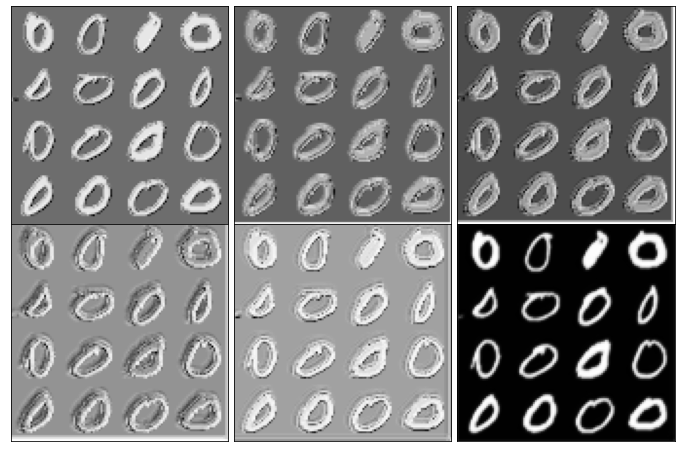

In [14]:
pred_img = model_pred.predict(train_img[0:1,:,:,:])
show_result(pred_img)

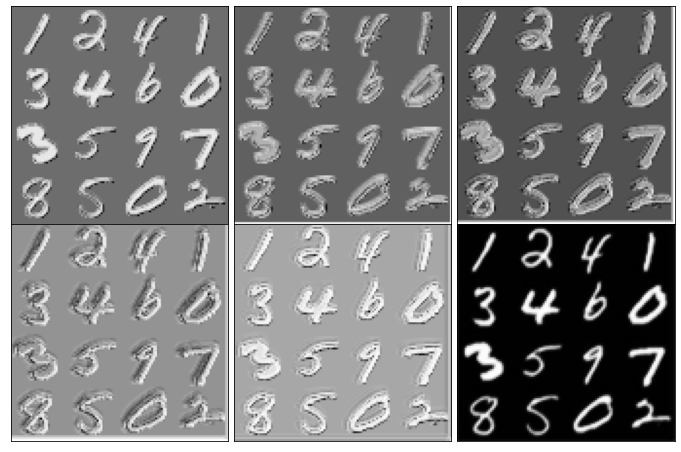

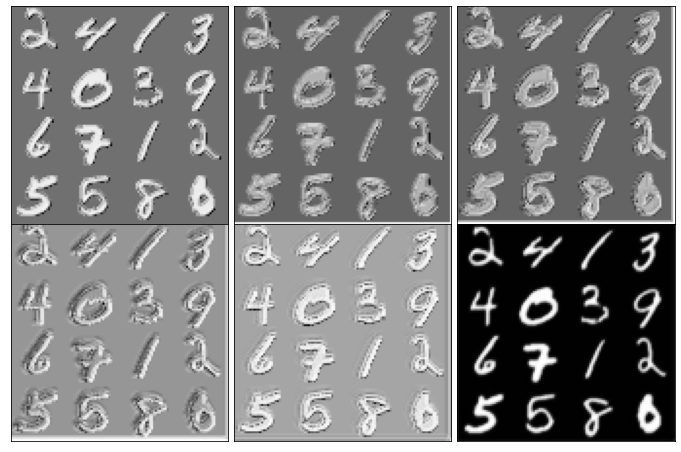

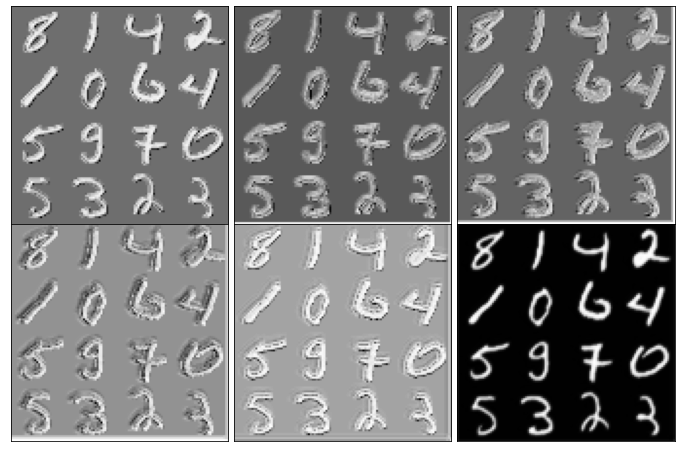

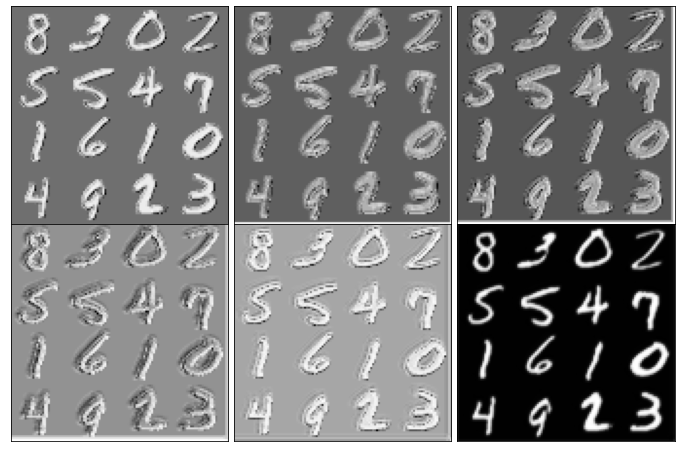

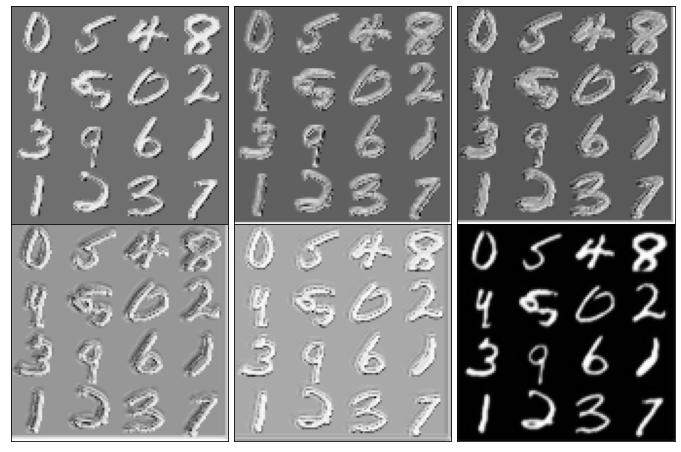

In [15]:
for i in range(5):
    pred_img2 = model_pred.predict(test_img[i:(i+1),:,:,:])
    show_result(pred_img2)

In [16]:
def show_result2(pred_img):
    conv1, conv2, conv3, conv4, conv5, pred = pred_img

    img_sum = np.max(pred_img[0], axis=3)[0,:,:]
    
    for i in range(len(pred_img)):
            if i==0:
                continue
            img_sum += np.max(pred_img[i], axis=3)[0,:,:]
    plt.imshow(img_sum, cmap='gray')

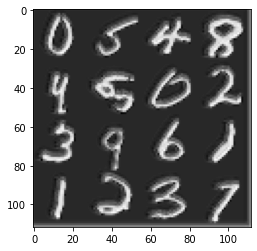

In [17]:
for i in range(5):
    pred_img2 = model_pred.predict(test_img[i:(i+1),:,:,:])
    show_result2(pred_img2)

In [50]:
def show_result3(pred_img):
    conv1, conv2, conv3, conv4, conv5, pred = pred_img
    
    imgs = [np.max(pred_img[i], axis=3)[0,:,:] for i in range(len(pred_img)-1)]
    base = np.vstack(imgs)
    #print(base.shape)
    base = base.reshape((len(pred_img)-1,)+imgs[0].shape )
    print(base.mean(axis=0).shape)
    plt.imshow(base.max(axis=0)-base.min(axis=0))

(112, 112)
(112, 112)
(112, 112)
(112, 112)
(112, 112)


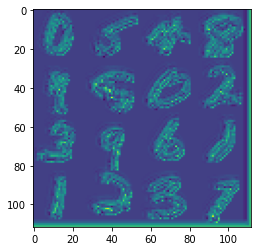

In [51]:
for i in range(5):
    pred_img2 = model_pred.predict(test_img[i:(i+1),:,:,:])
    show_result3(pred_img2)

(112, 112)
(112, 112)
(112, 112)
(112, 112)
(112, 112)


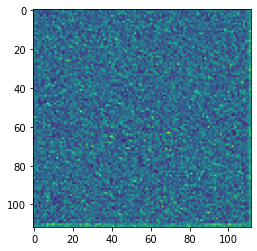

In [52]:
for i in range(5):
    pred_img2 = model_pred.predict(np.random.random( (1,112,112,1) ))
    show_result3(pred_img2)